In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv('titanic.csv')
titanic.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


# Using info() function

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Using nunique() function

In [4]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Conclusion: Survived, Pclass, Sex, Embarked are Categorical columns.

In [5]:
print('Unique values in Survived column: ',titanic['Survived'].unique())
print('Unique values in Pclass column: ',titanic['Pclass'].unique())
print('Unique values in emparked column: ',titanic['Embarked'].dropna().unique())

Unique values in Survived column:  [0 1]
Unique values in Pclass column:  [3 1 2]
Unique values in emparked column:  ['S' 'C' 'Q']


# Check for duplicate rows and remove duplicate rows

In [6]:
# Removing the duplicate rows(a row is said to be duplicate if entire row is duplicate)
titanic.duplicated().sum() # sum of all True values

0

In [7]:
titanic.drop_duplicates(inplace=True) # To drop duplicates

# Dealing with missing values

In [8]:
# How we check for missing values?
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Stratagies to deal with missing values

In [9]:
# In numerical column missing values are replaced by mean or median of that column
mean_age=titanic['Age'].mean()
mean_age

29.69911764705882

In [10]:
titanic['Age'].fillna(mean_age,inplace=True)

In [11]:
titanic['Age'].isna().sum()

0

# In categorical column missing values are replaced by mode/ most repeated

In [12]:
embarked_mode=titanic['Embarked'].dropna().mode()[0]
embarked_mode # returns series object because mode can have multiple values

'S'

In [13]:
titanic['Embarked'].fillna(embarked_mode,inplace=True)

In [14]:
titanic['Embarked'].isna().sum()

0

# Cabin as 687 missing values in 891 total values, very huge missing values---> simply drop that column

In [15]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [16]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# NOTE: If no of rows having missing values is very small wrt total no of rows then simply drop the missing rows

# #SbiSp and Parch add these both columns as family_members

### Task-1: Adding both columns and storing in new column

In [17]:
titanic['family_members']=titanic['SibSp']+titanic['Parch']
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### Task-2: Dropping SibSp and Parch columns

In [18]:
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


## Check how many survived and how many were dead?

<Axes: xlabel='Survived', ylabel='count'>

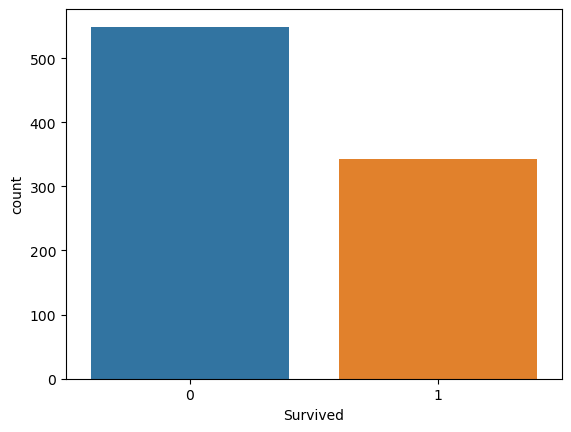

In [20]:
sns.countplot(data=titanic,x='Survived')

In [21]:
print("Total no of people Dead =",titanic[titanic['Survived']==0].shape[0])
print("Total no of people Survived =",titanic[titanic['Survived']==1].shape[0])

Total no of people Dead = 549
Total no of people Survived = 342


([<matplotlib.patches.Wedge at 0x27a1654d410>,
 [Text(-0.3925749350994583, 1.0275626113924428, ''),
  Text(0.3925750313068116, -1.0275625746369201, '')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

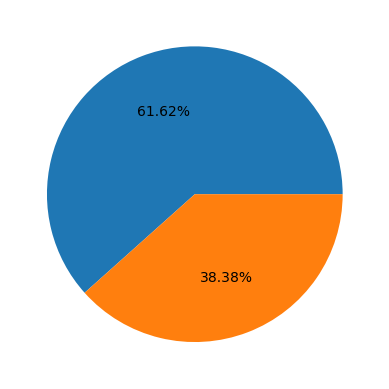

In [22]:
plt.pie(titanic['Survived'].value_counts(),autopct='%1.2f%%',radius=1)

# How gender effects the survival?

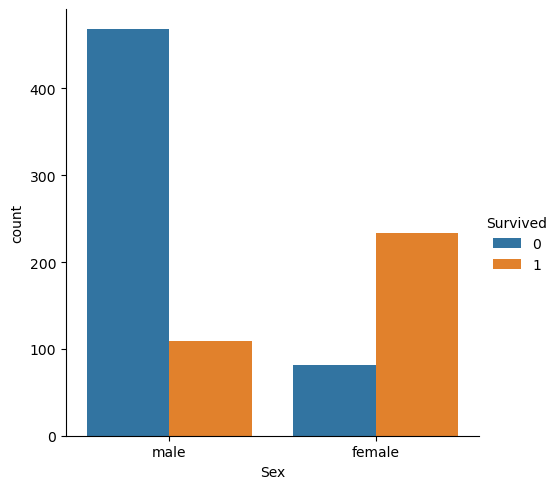

In [23]:
sns.catplot(data=titanic,x='Sex',hue='Survived',kind='count')

# Conclusion: Female survivalrate is much higher than males

In [24]:
svl_rate=titanic.groupby('Sex')['Survived'].value_counts(normalize=True)
svl_rate

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [25]:
print('No of female survived: ',round(svl_rate['female'][1]*100,2))
print('No of female dead: ',round(svl_rate['female'][0]*100,2))
print('No of male survived: ',round(svl_rate['male'][1]*100,2))
print('No of male dead: ',round(svl_rate['male'][0]*100,2))

No of female survived:  74.2
No of female dead:  25.8
No of male survived:  18.89
No of male dead:  81.11


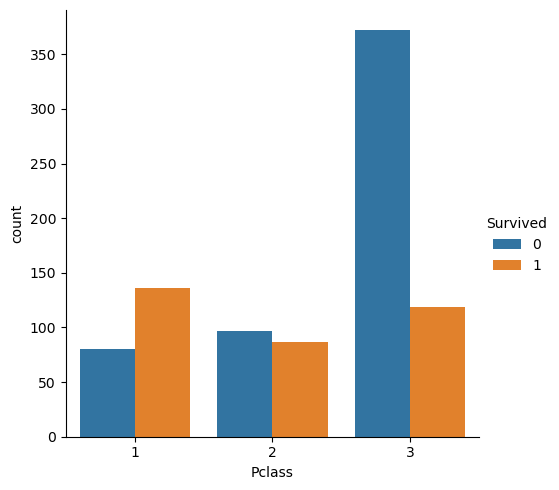

In [32]:
# Effect of passenger class on survival?
sns.catplot(data=titanic,x='Pclass',hue='Survived',kind='count')

In [40]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

([<matplotlib.patches.Wedge at 0x27a1c4c44d0>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5629922184066712, -1.059735703849566, '1'),
  Text(0.9561939770900165, -0.7250469489466027, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.11%'),
  Text(-0.3284121274038916, -0.6181791605789134, '24.24%'),
  Text(0.5577798199691761, -0.42294405355218484, '20.65%')])

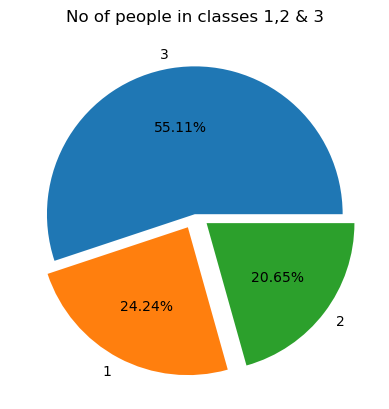

In [44]:
plt.title('No of people in classes 1,2 & 3')
plt.pie(titanic['Pclass'].value_counts(),labels=['3','1','2'],autopct='%0.2f%%',explode=[0,0.1,0.1])

In [27]:
svl_rate2=titanic.groupby('Pclass')['Survived'].value_counts(normalize=True)
svl_rate2

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

In [28]:
print("Class-1, %Survived:",svl_rate2[1][1]*100)
print("Class-1, %Not Survived:",svl_rate2[1][0]*100)
print("Class-2, %Survived:",svl_rate2[2][1]*100)
print("Class-2, %Not Survived:",svl_rate2[2][0]*100)
print("Class-3, %Survived:",svl_rate2[3][1]*100)
print("Class-3, %Survived:",svl_rate2[3][0]*100)

Class-1, %Survived: 62.96296296296296
Class-1, %Not Survived: 37.03703703703704
Class-2, %Survived: 47.28260869565217
Class-2, %Not Survived: 52.71739130434783
Class-3, %Survived: 24.236252545824847
Class-3, %Survived: 75.76374745417516


In [29]:
# Effect of embarked on survival?
svl_rate3=titanic.groupby('Embarked')['Survived'].value_counts(normalize=True)
svl_rate3

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

<Axes: xlabel='Embarked', ylabel='count'>

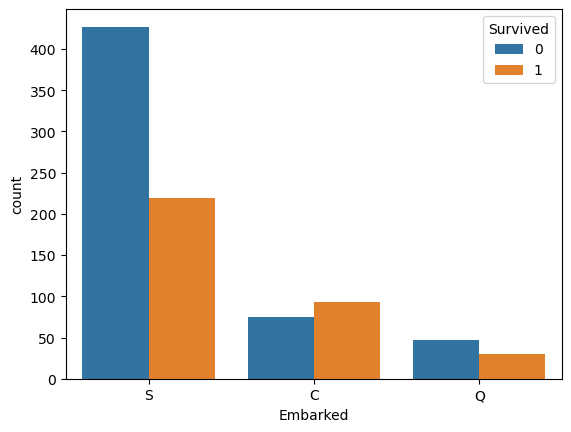

In [30]:
sns.countplot(data=titanic,x='Embarked',hue='Survived')

# Contuation...(Part-2)